# **XSPL Research Experience for High school students (REH)** 

### written by [Hannah Hasson](https://github.com/hrhasson/python-for-high-schoolers) (U of Rochester)  
&nbsp;  
## Playing with Fourier transforms

We talked last week in office hours about what the concept of a [Fourier transform](http://www.jezzamon.com/fourier/index.html) is (taking data from physical space into frequency space). Today we are going to play around with that in python!

Hopefully you have already experimented with the Loading_and_displaying_images.ipynb notebook where I showed you how to open image data in python. First we are going create some 1-D data and do a Fourier transform of that; then we will use our knowledge of loading in image data to do a Fourier transform on some images.

&nbsp;

We will need the same packages as last time: 

* [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) (cv2) for importing and manipulating images

* [Matplotlib](https://matplotlib.org/) for plotting/displaying things nicely

* [Numpy](https://numpy.org/doc/stable/user/tutorials_index.html), our old friend that we use to handle arrays

Let's import these all now

In [ ]:
import cv2
import matplotlib.pyplot as plt #the usual way we name this
import numpy as np #again, the usual way we name this

&nbsp;

Let's start off by making some simple 1-D data. First let's just make a list of x-values and then make a list of y-values that follow sin(x) and plot it up:

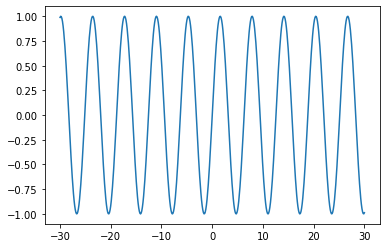

In [ ]:
xvals = np.linspace(-30,30,500)
yvals = np.sin(xvals)

plt.plot(xvals,yvals)

Cool! Looks like a sine curve, as it should. So before we take a Fourier transform (FT) of this curve, what do we expect? How many frequencies are present?

&nbsp;

We will now take the Fourier transform of the 1D data using the function **fft** from the numpy subpackage [numpy.fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft) which we will just call with 

    np.fft.fft(ydata)

Let's do this to our sine wave:

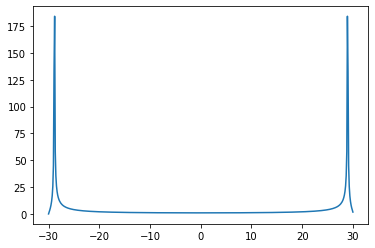

In [ ]:
ft_sin = np.fft.fft(yvals)

plt.plot(xvals, np.abs(ft_sin))

I'm sure you have several questions right now:

1. Why the heck are there 2 lines if there's only one frequency?
2. Why are the lines wide at the bottom?
3. Why are we taking the absolute value to plot?
4. How do we get the frequency on the x-axis?

Here are my answers:

1. Basically, negative frequencies in Fourier space come from reading the data backwards. You are probably now thinking "aren't the frequencies the same forwards and backwards?" Yes, yes they are! So Fourier transforms always generate symmetric data with a negative and positive version of whatever frequencies are present. 

  **This means you can pretty much just ignore all the negative frequencies and stick to the positive side of the axis.**


2. The fact that our lines aren't perfectly narrow means that there must be small amounts of other freuqncies present. "But HANNAH," you say, "we just put a single sine wave in???" That is true, but because our data isn't infinitely long, it has data hanging out on the edges (beginning and end). This makes the algorithm confused, making it think that there must be little pieces of other frequencies that add to get drop-offs at the edges. One way to ease this effect is by doing something called ["windowing,"](https://en.wikipedia.org/wiki/Window_function) which we may touch on later if we have time.

3. Why do we take the absolute value? This one is simple-ish: Fourier transforms output data with complex numbers, but we don't want to plot in the complex plane. So by taking the absolute value, we basically sum the real and imaginary legs of the triangle and get the hypotenuse in real numbers. Then we can plot!

4. This is where another function from the numpy.fft package comes in: **fftfreq.** This function will compute the frequency axis for you if you supply the number of data points and the spacing between each:


    np.fft.fftfreq(npoints, d = spacing)

Let's compute this now and plot again with the new axis:

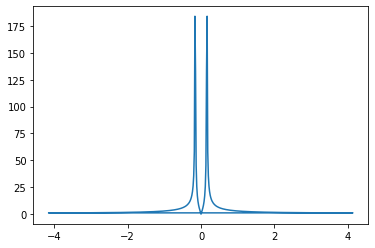

In [ ]:
freq = np.fft.fftfreq(xvals.shape[-1], d = (60/499)) #because our axis goes from -30 to 30 and has 500 values

plt.plot(freq, np.abs(ft_sin))

Ta-da! I want you to play with doing this to as many other functions as you can think of and see if the result makes sense to you. For example, let's try adding a few different sine functions:

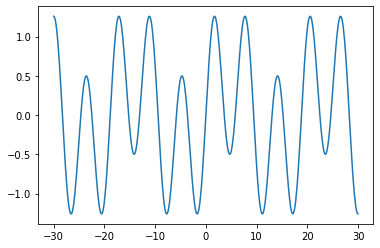

In [ ]:
def multi(x):
  y = np.sin(x)+ 0.5*np.sin(x/3)
  return y

multi_y = multi(xvals)

plt.plot(xvals, multi_y)

Pretty funky, eh? Let's check out its Fourier spectrum

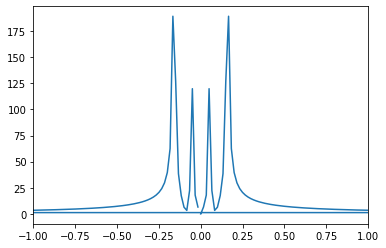

In [ ]:
ft_multi = np.fft.fft(multi_y)

plt.plot(freq, np.abs(ft_multi))
plt.xlim(-1,1)
plt.show()

Just as we shold expect: 2 frequencies! Try this on your own later with some other functions and then google their spectra.

&nbsp;

Now we are going to do a quick demo of doing this with 2D data! Let's load in our sample image from before:


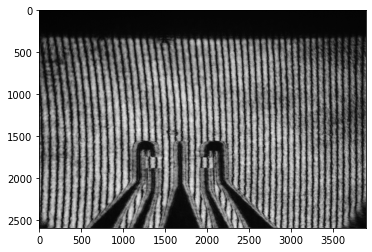

In [ ]:
# Load an color image in grayscale
img = cv2.imread('practice_image.jpg',0)
plt.imshow(img, cmap = 'gray')


Now we can use a slightly different function for 2D data: [numpy.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html#numpy.fft.fft2). Let's try it:

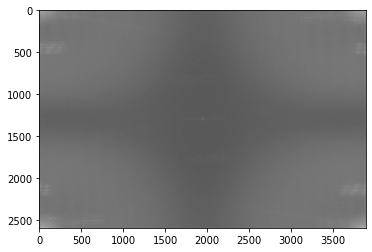

In [ ]:
img_fft = np.fft.fft2(img)
plt.imshow(np.log10(np.abs(img_fft)), cmap = 'gray') #plot in log10 so it's easier to see

This is kinda weird looking, huh? You're probably wondering what the heck we're looking at? The x-axis here is frequency in the x direction, and the y-axis is frequency in the y direction. Again, we can ignore negative frequencies.

Let's make one more mod:

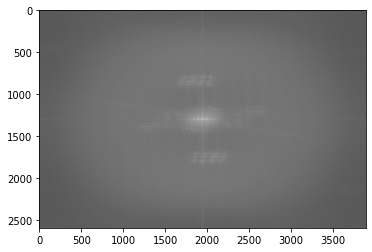

In [ ]:
img_ffts =  np.fft.fftshift(img_fft)
plt.imshow(np.log10(np.abs(img_ffts)), cmap = 'gray') #plot in log10 so it's easier to see

We applied the [fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html#numpy.fft.fftshift) function. Now we can see things with the zero-frequency in the middle. For whatever reason, the FFT2 algorithm outputs the zero frequency in the outer corners, so we simply shift the order of the data so that zero is in the center. 

&nbsp;


Now I want you to try doing with with the other sample images that I put in the directory. Try slicing these images too like you did in the previous notebook.

In [ ]:
#code goes here!


Finally, I want you to try undoing the FFT by taking an *inverse* Fourier transform! The function for that is [numpy.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html#numpy.fft.ifft2) for 2D Fourier transforms (you can guess what it is for the 1D case probably). Go ahead and look at the documentation and give it a try here!

Use plt.imshow() to see the result and make sure the original image came back out:

In [ ]:
#code here pls
